You should implement at least the modules Linear (fully connected layer), ReLU , Tanh , Sequential
to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sequential import Sequential
from linear import Linear
from activations import ReLU, Tanh
from losses import MSE
from utils import build_data

In [4]:
import warnings
warnings.filterwarnings("ignore", message="other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.")

In [5]:
x_train, y_train = build_data(1000)
x_validation, y_validation = build_data(1000)

In [6]:
def build_model():
    model = Sequential(MSE(), input_size=2)
    model.add_layer(Linear(2, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(Tanh(25))
    model.add_layer(Linear(25, 2))
    return model

In [7]:
model = build_model()
model.summary()
model.fit(x_train, y_train, x_validation, y_validation, epochs=100, step_size=0.001)

Model with 7 layers
	Input size : 2
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	Tanh activation layer of size 25
	2 fully connected output units
Loss at epoch 1 : 0.26214705815020717
Loss at epoch 2 : 0.2094088450842537
Loss at epoch 3 : 0.18831051644310356
Loss at epoch 4 : 0.1923653817176819
Loss at epoch 5 : 0.19570881366235698
Loss at epoch 6 : 0.21172951058810577
Loss at epoch 7 : 0.4796648635659367
Loss at epoch 8 : 0.4276466245353222
Loss at epoch 9 : 0.3974830780811608
Loss at epoch 10 : 0.2861089642047882
Loss at epoch 11 : 0.23604735933616758
Loss at epoch 12 : 0.21110998628288508
Loss at epoch 13 : 0.19431830468401312
Loss at epoch 14 : 0.18331826154328884
Loss at epoch 15 : 0.18013532582178596
Loss at epoch 16 : 0.16615149747868418
Loss at epoch 17 : 0.16200483917980454
Loss at epoch 18 : 0.1573194277747534
Loss at epoch 19 :

(0.951, 0.922)

In [8]:
preds = model.predict(x_validation)

In [9]:
def get_coords(x, indexes):
    xs = []
    ys = []
    for i in indexes:
        xs.append(x[i][0])
        ys.append(x[i][1])
    return xs, ys

In [10]:
x1, y1 = get_coords(x_validation, np.where(preds != y_validation)[0])
x2, y2 = get_coords(x_validation, np.where(preds == y_validation)[0])

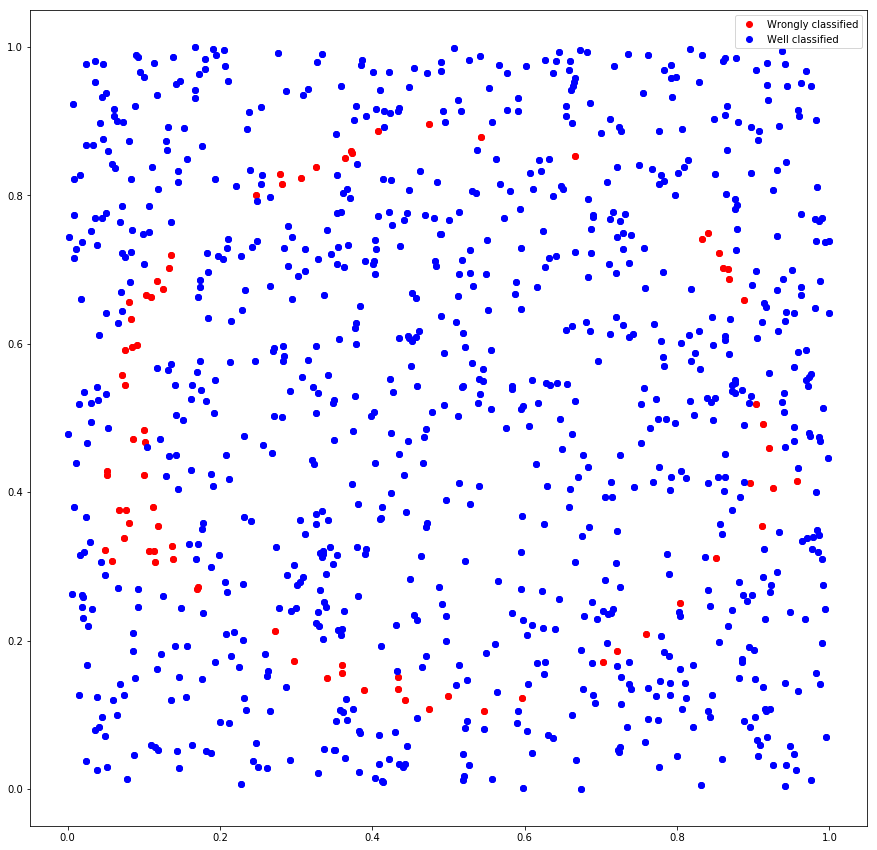

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(x1, y1, 'ro', color='red', label='Wrongly classified')
plt.plot(x2, y2, 'ro', color='blue', label='Well classified')
plt.legend()

We see that the classifier makes mistakes on the boundary which is normal.